In [1]:
! pip3 install pandas
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
# from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Предсказание пола по лемматизированным отзывам

In [3]:
from google.colab import files
files.upload()

Saving Финальный датасет норм.csv to Финальный датасет норм.csv


{'Финальный датасет норм.csv': b',stars,name,feedback,avg_sent,gender,num_words,emoji\r\n0,5,\xd0\xa1\xd1\x82\xd0\xb0\xd1\x81,\xd0\xb2\xd0\xb7\xd1\x8f\xd1\x82\xd1\x8c,1.0,M,1,0\r\n1,4,\xd0\xa0\xd0\xb0\xd1\x85\xd0\xbc\xd0\xb0\xd0\xbd,\xd0\xbd\xd0\xb5\xd0\xbf\xd0\xbb\xd0\xbe\xd1\x85\xd0\xbe\xd0\xb9 \xd0\xb5\xd1\x89\xd1\x91 \xd1\x83\xd1\x81\xd0\xbf\xd0\xb5\xd1\x82\xd1\x8c \xd0\xb4\xd0\xbe\xd0\xbb\xd0\xb3\xd0\xbe \xd0\xbf\xd1\x80\xd0\xbe\xd0\xbd\xd0\xbe\xd1\x81\xd0\xb8\xd1\x82\xd1\x8c,7.0,M,7,0\r\n2,5,\xd0\x90\xd0\xbd\xd0\xb4\xd1\x80\xd1\x8e,\xd0\xbd\xd0\xbe\xd1\x80\xd0\xbc\xd0\xb0,1.0,M,1,0\r\n3,5,\xd0\xa1\xd0\xb5\xd1\x80\xd0\xb3\xd0\xb5\xd0\xb9,,1.0,M,1,1\r\n4,5,\xd0\x90\xd0\xbb\xd0\xb5\xd0\xba\xd1\x81\xd0\xb5\xd0\xb9,\xd0\xbd\xd0\xbe\xd1\x80\xd0\xbc\xd0\xb0\xd0\xbb\xd1\x8c\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xb4\xd0\xbe\xd0\xbc \xd1\x85\xd0\xbe\xd0\xb4\xd0\xb8\xd1\x82\xd1\x8c \xd0\xbf\xd0\xbe\xd0\xb9\xd1\x82\xd0\xb8 \xd0\xb1\xd1\x80\xd0\xb0\xd1\x82\xd1\x8c,5.0,M,10,0\r\n5,5,\xd0\x98\xd0\xb2\xd

In [4]:
data = pd.read_csv('Финальный датасет норм.csv')
data

,Unnamed: 0,stars,name,feedback,avg_sent,gender,num_words,emoji
0,0,5,Стас,взять,1.000000,M,1,0
1,1,4,Рахман,неплохой ещё успеть долго проносить,7.000000,M,7,0
2,2,5,Андрю,норма,1.000000,M,1,0
3,3,5,Сергей,NaN,1.000000,M,1,1
4,4,5,Алексей,нормальный дом ходить пойти брать,5.000000,M,10,0
...,...,...,...,...,...,...,...,...
2495,2495,5,Юлия,NaN,1.000000,F,1,1
2496,2496,5,Татьяна,отличный сон размер размер,3.500000,F,7,0
2497,2497,1,Захарова Ира,махровый захотеть носить точно свободный,4.666667,F,14,0
2498,2498,3,надежда,махровый полотенце отказаться,5.000000,F,5,0


In [5]:
data.drop(['Unnamed: 0'], axis =1, inplace=True) # выкинем ненужные колонки

In [6]:
data["gender"]=data["gender"].map({'M':1,'F':0}) 

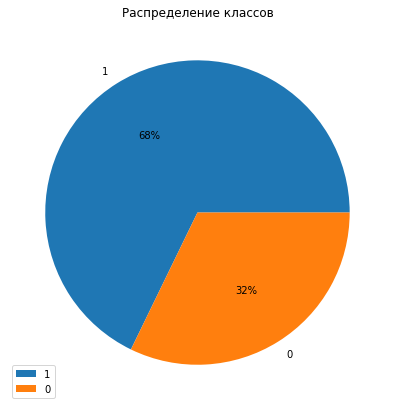

In [7]:
classes = pd.value_counts(data["gender"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 


plt.ylabel('')

plt.show()

## Переведем текстовые данные в количественные

In [8]:
data['feedback'] = data.feedback.apply(lambda x: str(x).lower())
data

,stars,name,feedback,avg_sent,gender,num_words,emoji
0,5,Стас,взять,1.000000,1,1,0
1,4,Рахман,неплохой ещё успеть долго проносить,7.000000,1,7,0
2,5,Андрю,норма,1.000000,1,1,0
3,5,Сергей,nan,1.000000,1,1,1
4,5,Алексей,нормальный дом ходить пойти брать,5.000000,1,10,0
...,...,...,...,...,...,...,...
2495,5,Юлия,nan,1.000000,0,1,1
2496,5,Татьяна,отличный сон размер размер,3.500000,0,7,0
2497,1,Захарова Ира,махровый захотеть носить точно свободный,4.666667,0,14,0
2498,3,надежда,махровый полотенце отказаться,5.000000,0,5,0


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=100) # можно менять параметры векторайзера

feature_matrix = vectorizer.fit_transform(data.feedback)

In [10]:
# добавим эту матрицу к датафрейму
import scipy.sparse

word_features= pd.DataFrame.sparse.from_spmatrix(feature_matrix)
# print(word_features.shape)


data = pd.concat([data, word_features], axis=1).dropna()

In [ ]:
#data

In [11]:
etalon = data.drop(['name','feedback'], axis=1)
display(etalon.head(2))

,stars,avg_sent,gender,num_words,emoji,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,5,1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,7.0,1,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.709958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Датасет готов, можно начинать обучение.




 Разделим данные на матрицу и целевую переменную

In [12]:

data2 = etalon.drop('gender', axis=1)
X = data2.values
display(X, X.shape)

array([[ 5.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        ,  7.        ,  7.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 5.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  4.66666667, 14.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  5.        ,  5.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  8.        , 24.        , ...,  0.        ,
         0.        ,  0.        ]])

(2500, 104)

In [13]:
y = data['gender'].values # отдельно вынесли массив со значениями скорости ветра
display(y, y.shape)

array([1, 1, 1, ..., 0, 0, 0])

(2500,)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

In [19]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=2000, verbose=1)

In [21]:
from sklearn.metrics import classification_report

Random forest

In [22]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [23]:
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished


In [24]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50       242
           1       0.76      0.91      0.83       508

    accuracy                           0.74       750
   macro avg       0.72      0.65      0.66       750
weighted avg       0.73      0.74      0.72       750



Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gb_clf = GradientBoostingClassifier(n_estimators=5000, random_state=10, verbose=1)

In [27]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2339           36.23s
         2           1.2161           33.04s
         3           1.2011           30.22s
         4           1.1882           28.68s
         5           1.1774           27.73s
         6           1.1671           27.07s
         7           1.1585           26.65s
         8           1.1508           26.23s
         9           1.1427           26.01s
        10           1.1351           25.80s
        20           1.0840           23.96s
        30           1.0530           23.09s
        40           1.0257           22.18s
        50           1.0050           21.93s
        60           0.9861           21.48s
        70           0.9678           21.11s
        80           0.9528           20.88s
        90           0.9388           20.68s
       100           0.9263           20.59s
       200           0.8178           19.87s
       300           0.7454           19.32s
       40

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [28]:
gb_y_pred = gb_clf.predict(X_test)

In [29]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.61      0.43      0.50       242
           1       0.76      0.87      0.81       508

    accuracy                           0.73       750
   macro avg       0.68      0.65      0.66       750
weighted avg       0.71      0.73      0.71       750



## Предсказание оценки по полным отзывам

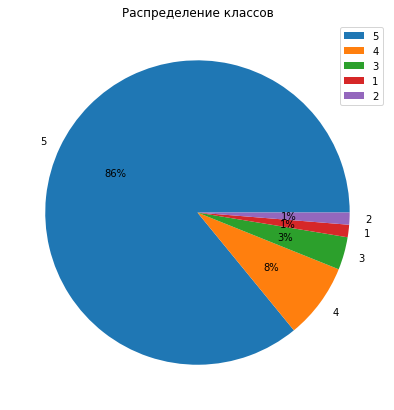

In [36]:
classes = pd.value_counts(data["stars"])

classes.plot(kind='pie',figsize=(7,7),autopct='%0.f%%', legend=True, title ="Распределение классов") 


plt.ylabel('')

plt.show()

Разделим данные на матрицу и целевую переменную

In [37]:
data3 = etalon.drop('stars', axis=1)
X = data3.values
y = data['stars'].values
#display(y, y.shape)

Random forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=25)

In [40]:
forest = RandomForestClassifier(n_estimators=5000, verbose=1)

In [41]:
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    1.2s finished


In [42]:
print(classification_report(y_test, forest_y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         7
           3       0.08      0.04      0.06        23
           4       0.36      0.07      0.12        58
           5       0.89      0.98      0.93       652

    accuracy                           0.86       750
   macro avg       0.27      0.22      0.22       750
weighted avg       0.80      0.86      0.82       750



Boosting

In [43]:
gb_clf = GradientBoostingClassifier(n_estimators=5000, random_state=10, verbose=1)

In [44]:
gb_clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         932.2264            2.03m
         2         892.5124            1.93m
         3         841.4004            1.90m
         4         815.7454            1.97m
         5         797.9543            1.95m
         6         783.9083            1.95m
         7         768.6207            1.93m
         8         749.3184            1.92m
         9         734.9462            1.95m
        10         718.6978            1.95m
        20         626.4949            1.95m
        30         570.1878            1.96m
        40         527.1183            1.96m
        50         495.6062            1.96m
        60         463.9691            1.95m
        70         437.4630            1.94m
        80         413.5975            1.93m
        90         392.0944            1.92m
       100         376.5984            1.90m
       200         273.6296            1.84m
       300         215.6905            1.81m
       40

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [47]:
gb_y_pred = gb_clf.predict(X_test)

In [46]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         7
           3       0.19      0.17      0.18        23
           4       0.20      0.10      0.14        58
           5       0.90      0.95      0.92       652

    accuracy                           0.84       750
   macro avg       0.26      0.25      0.25       750
weighted avg       0.80      0.84      0.82       750

